# Flare 2014/06/10

In [1]:
import numpy as np
# import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
# import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:/solar flares/data/2014-06-10/fits/Ha/"

# Get a list of all files and directories in the specified path
file_list = os.listdir(folder_path)
file_list.sort()
# Print the names of files and directories
print(f"{len(file_list)} Files in '{folder_path}':")
for item in file_list:
    print(item)

def timeframe_to_filename_fits(frame):
    if frame <0 or frame >= 270:
        raise IndexError(f'frame number {frame} is not in (0, 270).')
    else:
        return folder_path + file_list[frame]
ttff = timeframe_to_filename_fits



270 Files in 'E:/solar flares/data/2014-06-10/fits/Ha/':
sst.crisp_halpha_10Jun2014_12_39_53.fits
sst.crisp_halpha_10Jun2014_12_39_57.fits
sst.crisp_halpha_10Jun2014_12_40_01.fits
sst.crisp_halpha_10Jun2014_12_40_05.fits
sst.crisp_halpha_10Jun2014_12_40_09.fits
sst.crisp_halpha_10Jun2014_12_40_13.fits
sst.crisp_halpha_10Jun2014_12_40_17.fits
sst.crisp_halpha_10Jun2014_12_40_21.fits
sst.crisp_halpha_10Jun2014_12_40_25.fits
sst.crisp_halpha_10Jun2014_12_40_29.fits
sst.crisp_halpha_10Jun2014_12_40_33.fits
sst.crisp_halpha_10Jun2014_12_40_37.fits
sst.crisp_halpha_10Jun2014_12_40_41.fits
sst.crisp_halpha_10Jun2014_12_40_45.fits
sst.crisp_halpha_10Jun2014_12_40_49.fits
sst.crisp_halpha_10Jun2014_12_40_53.fits
sst.crisp_halpha_10Jun2014_12_40_57.fits
sst.crisp_halpha_10Jun2014_12_41_01.fits
sst.crisp_halpha_10Jun2014_12_41_05.fits
sst.crisp_halpha_10Jun2014_12_41_09.fits
sst.crisp_halpha_10Jun2014_12_41_13.fits
sst.crisp_halpha_10Jun2014_12_41_17.fits
sst.crisp_halpha_10Jun2014_12_41_21.fits


In [3]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    wvl = io[0].data
    print(np.shape(wvl))
    print(np.average(wvl))

wvl = np.array([6561.96799994, 6562.22599995, 6562.48399997, 6562.74199998, 6563.00000000, 6563.25800002, 6563.51600003, 6563.77400005, 6564.03200006])
np.save(r"line_data/wav_sstHa.npy", wvl)

(9, 1424, 1424)
390142.12


In [4]:
head0 = f.getheader(ttff(0))
head7 = f.getheader(ttff(7))
head0

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                  -32 /bits per data value                             
NAXIS   =                    3 /number of axes                                  
NAXIS1  =                 1424 /                                                
NAXIS2  =                 1424 /                                                
NAXIS3  =                    9 /                                                
EXTEND  =                    T /file may contain extensions                     
DATE    = '2014-06-10'         / observation date                               
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
NUMLINES=                    9 / no. of spectral line positions in CRISP scan   
LINE    = '      6563.00'      / spectral line observed                         
TIME    = '12:39:53'        

In [5]:
f1 = ttff(0)
f1.split('.')[1][-8:].replace('_', ':')

'12:39:53'

In [6]:
def filname_to_time(fname):
    return fname.split('.')[1][-8:].replace('_', ':')
time_list = [filname_to_time(fname) for fname in file_list]
time_list

['12:39:53',
 '12:39:57',
 '12:40:01',
 '12:40:05',
 '12:40:09',
 '12:40:13',
 '12:40:17',
 '12:40:21',
 '12:40:25',
 '12:40:29',
 '12:40:33',
 '12:40:37',
 '12:40:41',
 '12:40:45',
 '12:40:49',
 '12:40:53',
 '12:40:57',
 '12:41:01',
 '12:41:05',
 '12:41:09',
 '12:41:13',
 '12:41:17',
 '12:41:21',
 '12:41:25',
 '12:41:29',
 '12:41:33',
 '12:41:36',
 '12:41:40',
 '12:41:44',
 '12:41:48',
 '12:41:52',
 '12:41:56',
 '12:42:00',
 '12:42:04',
 '12:42:08',
 '12:42:12',
 '12:42:16',
 '12:42:20',
 '12:42:24',
 '12:42:28',
 '12:42:32',
 '12:42:36',
 '12:42:40',
 '12:42:44',
 '12:42:48',
 '12:42:52',
 '12:42:56',
 '12:43:00',
 '12:43:04',
 '12:43:08',
 '12:43:12',
 '12:43:16',
 '12:43:20',
 '12:43:24',
 '12:43:27',
 '12:43:31',
 '12:43:35',
 '12:43:39',
 '12:43:43',
 '12:43:47',
 '12:43:51',
 '12:43:55',
 '12:43:59',
 '12:44:03',
 '12:44:07',
 '12:44:11',
 '12:44:15',
 '12:44:19',
 '12:44:23',
 '12:44:27',
 '12:44:31',
 '12:44:35',
 '12:44:39',
 '12:44:43',
 '12:44:47',
 '12:44:51',
 '12:44:55',

In [7]:
def datacube(timeframe):
    if timeframe < 270 and timeframe >= 0:
        return f.getdata(ttff(timeframe))
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames 270."
        )

In [8]:
print(np.any(np.isnan(datacube(0)[0,:,:])))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

False
the maximum attained value in frame 0 is 4419737.0 and the 98 percile is 1797185.5


array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         6.03130176e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 4.61891846e+03, 5.77344873e+03,
         6.32965137e+03, 6.90138818e+03, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.50395874e+03, 5.50087891e+03, 7.83832373e+03,
         7.35948096e+03

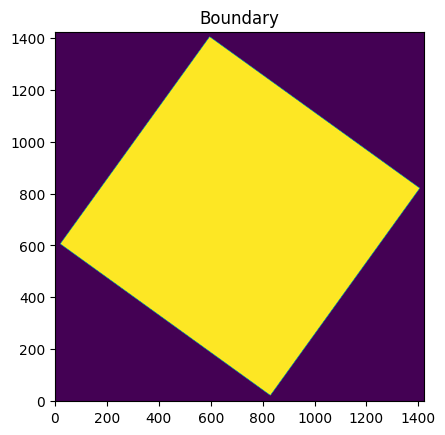

E:/solar flares/data/2014-06-10/fits/Ha/sst.crisp_halpha_10Jun2014_12_39_53.fits
s=(9, 1424, 1424)
the shape of the data is (270, 1, 9, 1424, 1424)
the wavelengths are self._wavel = array([6561.96799994, 6562.22599995, 6562.48399997, 6562.74199998,
       6563.        , 6563.25800002, 6563.51600003, 6563.77400005,
       6564.03200006])
(1424, 1424) (1424, 1424)
Boundary
Blue=Outside, yellow=Inside


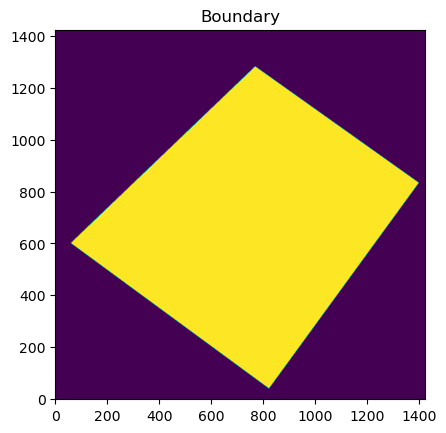

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
reload(un)

vertices = [(600, 60), (40, 823), (832, 1400), (1280, 770)]

Ha = un.SST_data_from_multiple_fits_files(timeframe_to_filename_fits,spectfilename='line_data/wav_sstHa.npy', number_of_frames=270,
                 time=time_list, name_of_line='Ha14', thresh=[0, np.percentile(datacube(0), 99.5)],  boundary_methode='By_user', 
                 boundary_arguments = vertices)

# Ha.datacube
# np.shape(Ha.datacube), Ha.datacube(0)[0:30:5,10:20:5, 100:200:30], 
Ha.boundary


In [10]:
# Ha.calculate__FOV_spect_over_time()

In [11]:
reload(un)
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Ha.shape=}')

Not official start flare defined for Ha14 falling back to first of TIME[0], the execpt_time 12:39:53.
the mean cadence is 3.9665427509293614 seconds for this line!
Ha.shape=(270, 1, 9, 1424, 1424)


[[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]
The guessed filters are [[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]


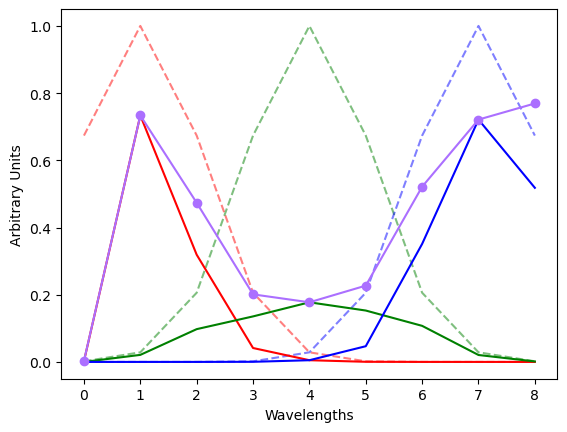

In [12]:
# %matplotlib inline
gf = un.guess_filters(9)
print(gf)
Ha.update_filters(None)# [[3,2], [7,2], [11,2]]
Ha.plot_filt(880,900)
plt.show()

In [13]:
# # %matplotlib widget
# print(f'the number of frames is {Ha._number_of_frames}')
# for frame in range(0 ,Ha._number_of_frames, 45):
#     # frame=0
#     Ha.ccp_frame(frame,Show=False)
#     print(f'frame number {frame} at time {Ha._time[frame]}')
#     plt.imshow(Ha.current_ccp, origin='lower')
#     # plt.imshow(Ha.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

#     plt.imshow(Ha.boundary, origin='lower', alpha=0.2)
#     plt.show()
#     print(np.shape(Ha.current_ccp))#,np.shape(Ha.boundary))

In [14]:
# fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# # plt.title('frame 40 jeweet')

# frame = 269
# Ha.ccp_frame(frame,Show=False)


# ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
# Ha.frame_integrated_spect(frame)
# ax[0].plot(Ha._wavel, Ha.av_spect, label='sst data')
# ax[0].legend()
# ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
# ax[1].set_title("COCOplot of frame "+str(frame))
# plt.show()


In [15]:
# Ha.current_ccp[0:30:10,0:60:20,:]
# Ha.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

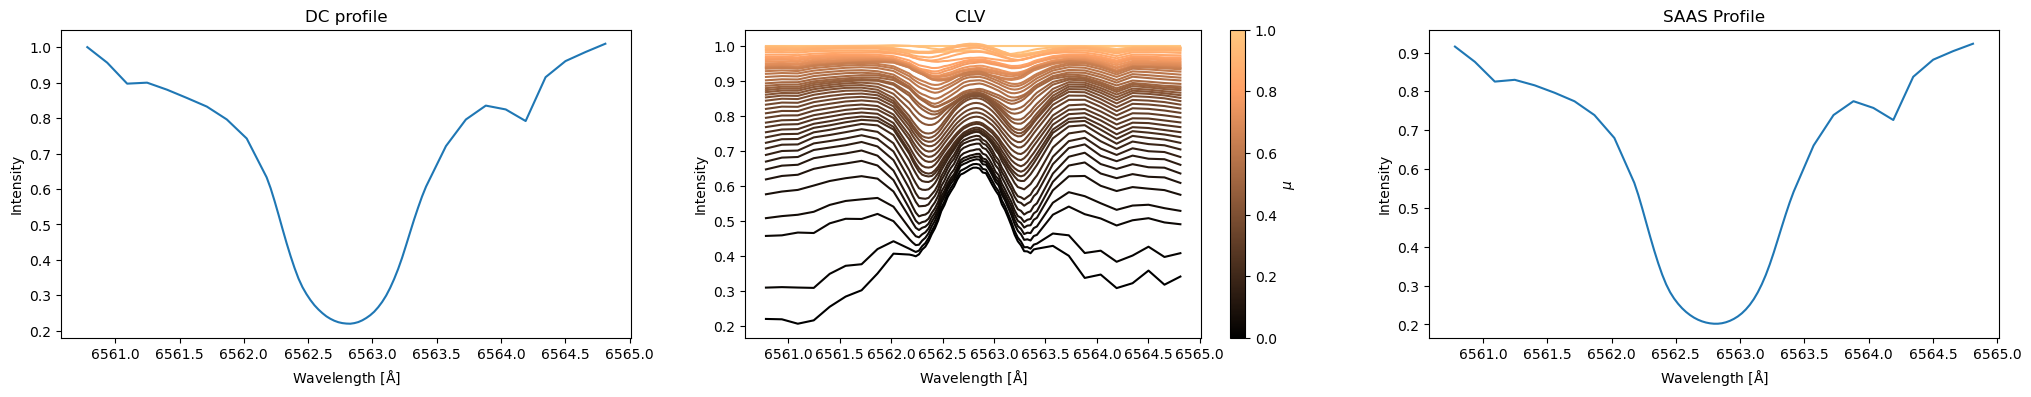

6562.797056366136 6562.797056366135


In [16]:
reload(un)
theor_Ha = un.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

## Calculating the $\mu$ !!!!! 


In [17]:
Ha.shape

(270, 1, 9, 1424, 1424)

In [18]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Ha.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        # print(add_enters(str(hdu.header), length_row=79))
        try: 
            print("x =", hdu.header['CRVAL1'], "y=", hdu.header['CRVAL2'])
        except KeyError:
            pass

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

x = -878.852300514 y= -304.754577918


z=972.0082304178293, width = 114.27063735072942
[-935.9876191893648, -821.7169818386353, -361.8898965933647, -247.61925924263528]
does MU contain nan's? True


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_19672\1154470221.py:11: RuntimeWarning: invalid value encountered in sqrt
  mu  = (1-(x**2 + y**2)/radius**2)**0.5


COCOPLOT at  t=12:40:33 UT (frame number 10 )


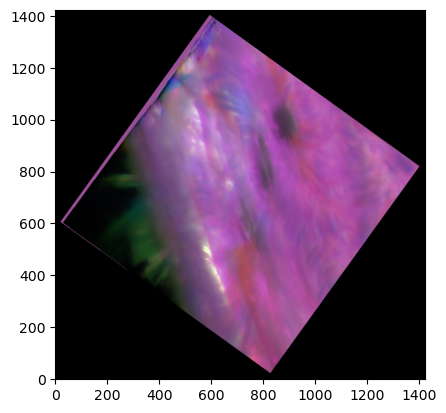

AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.12468302652962168 for timeframe 10
Coundourplot succesfully saved.


In [19]:
def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

# 60 arcsec is de zijde van (20,600) tot (800, 20) pixels op 1424x1242 pixles
# by pythagoras 
z = ((800-20)**2 + (600-20)**2 )**0.5
width = 60 * 1424/z*1.3
print(f"{z=}, {width = }")

position = (-878.852300514, -304.754577918)

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], Ha.shape[4])
y = np.linspace(fyp[0], fyp[1], Ha.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.frame_integrated_spect(timeFrame)
        over.ccp_frame(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        K = MU * over.boundary
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=Ha, save=True, save_name=Ha.name_of_line, timeFrame=10)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


(143, 143) (143, 143) (142, 142)


c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:382: RuntimeWarning: invalid value encountered in sqrt
  ipts = _np.vstack([_np.atleast_2d(x), _np.atleast_2d(y), _np.atleast_2d(_np.sqrt(1.-(x**2+y**2)))])
c:\Users\Gebruiker\Anaconda3\Lib\site-packages\nessi\integrator.py:358: RuntimeWarning: invalid value encountered in arcsin
  mu = _np.cos(_np.arcsin(rad_dist))


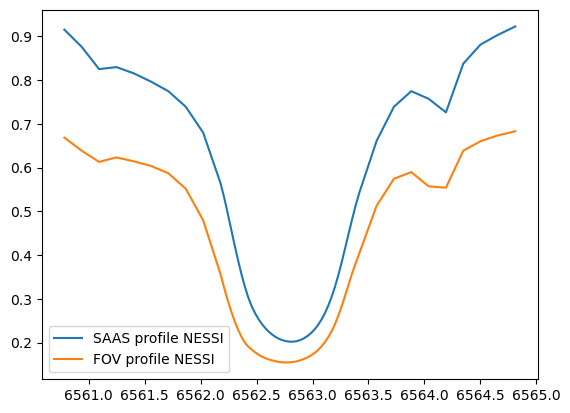

In [20]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

In [21]:
frame = 9
frame, Ha.shape

(9, (270, 1, 9, 1424, 1424))

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_19672\1816192150.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')


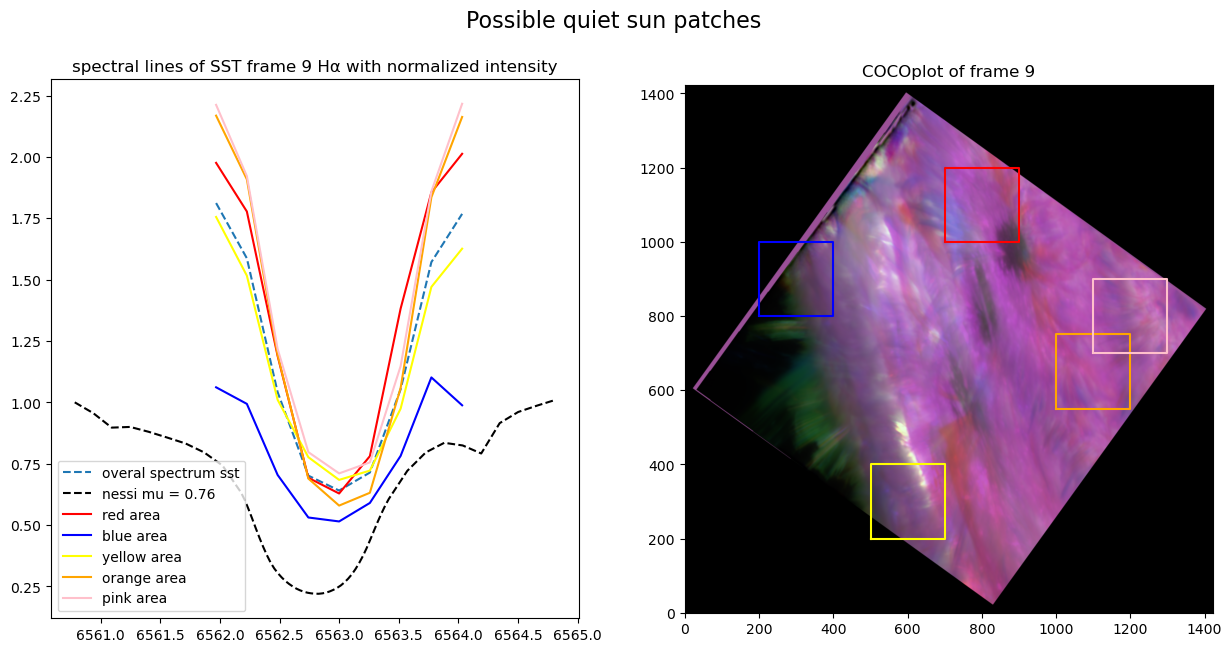

In [22]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Ha.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(700,900),(1000,1200)], [(200,400), (800, 1000)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc*theor_Ha.sst_clv[0] + theta[1], '--', label='nessi mu = 0.76', color='black')

ax[1].imshow(Ha.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Ha._wavel, Ha.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')
plt.show()


### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [23]:
color_wanted_patch = 'pink'

the edges of the patch are denoted by the xlim: (1100, 1300) and ylim: (700, 900)


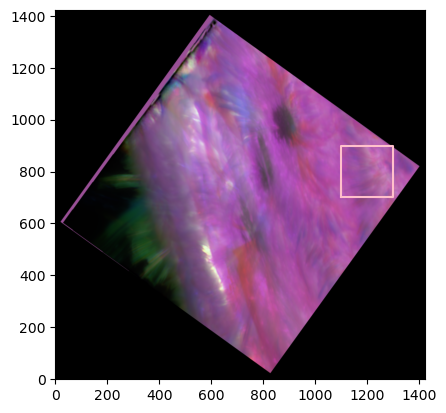

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

In [24]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
Ha.quiet_sun

The quiet sun is pick at x (-839.6646188364484, -297.68794679581856) with average              mu 0.37170585085462843


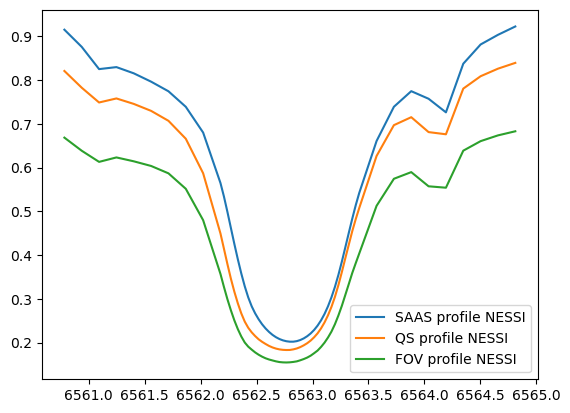

In [25]:
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim)


[6561.96799994 6562.22599995 6562.48399997 6562.74199998 6563.
 6563.25800002 6563.51600003 6563.77400005 6564.03200006] [2.21186185 1.92179585 1.21803284 0.79717702 0.71056116 0.75544816
 1.14754975 1.85888767 2.21630454] [0.61453353 0.39413491 0.21557753 0.1831661  0.20857601 0.35736965
 0.58338544 0.70250909 0.68221833]
[0.20294363 3.45567687]
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 283.03333980317274
        x: [ 2.506e-01  3.176e+00]
      nit: 10
      jac: [ 9.918e-05  1.297e-04]
 hess_inv: [[ 6.499e-06  1.958e-06]
            [ 1.958e-06  6.085e-05]]
     nfev: 88
     njev: 26


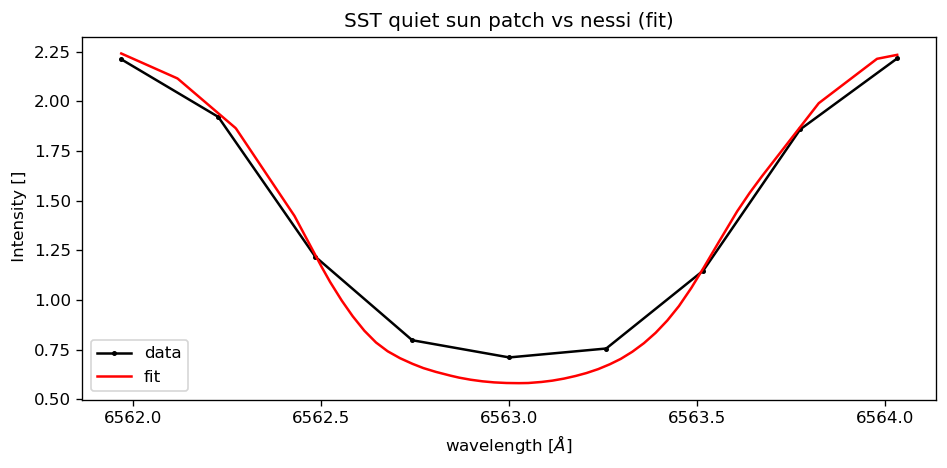

de p-waarde is  1.0398304534700927e-06 
Chi^2 reduced= 40.43333425759611 
aantal vrijheidgraden= 7 
chi^2= 283.03333980317274
we behouden de fit tot op een betrouwbaarheidsniveau van  1.0398304534700927e-06 
Oftewel verwerp als p-waarde <lpha-niveau 


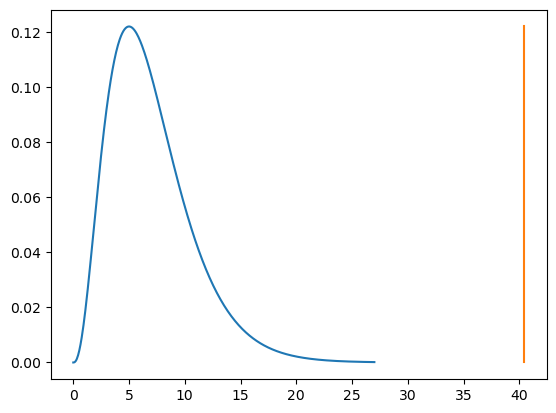

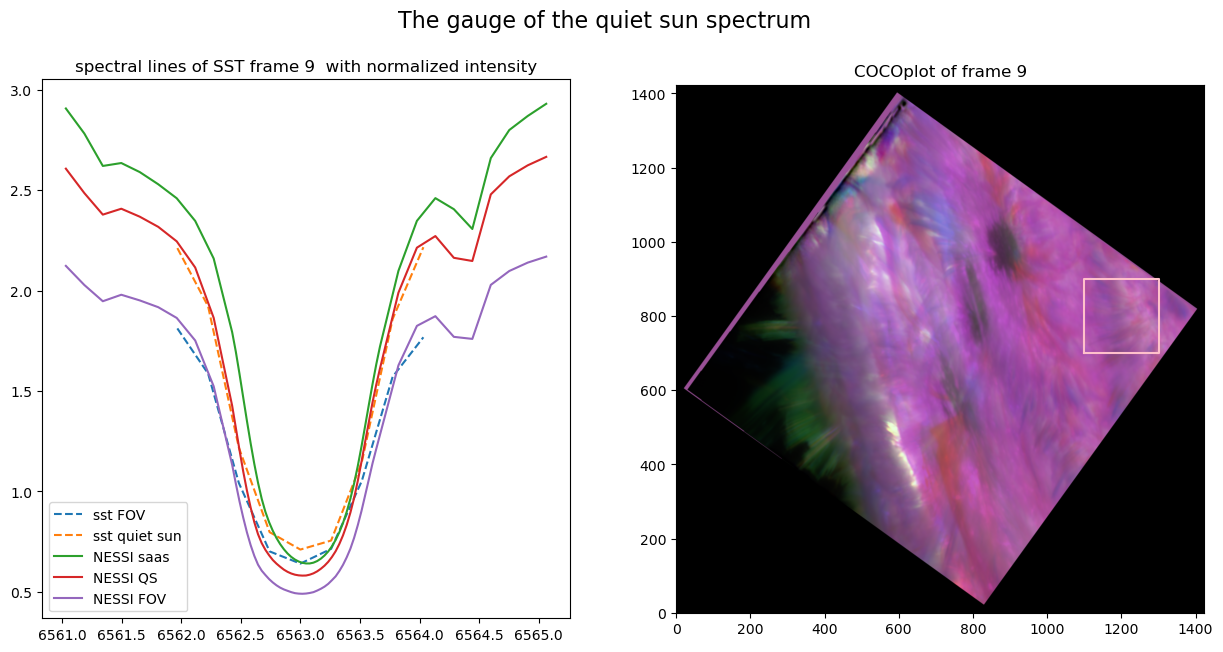

In [26]:
reload(un)
un.fit_qs_to_NESSI(theor_Ha, Ha)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [27]:
sst_data = Ha
Ha.shape

(270, 1, 9, 1424, 1424)

In [28]:
Ha.calculate__FOV_spect_over_time()

In [29]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (1100, 1300), 'ylim': (700, 900), 'color': 'pink'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [269] at time ['t=12:57:40 UT'].
The SST data runs from t=12:39:53 UT to t=12:57:40 UT.
The areafactor for THIS flare is 0.0018655045742858262 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 149.92%.


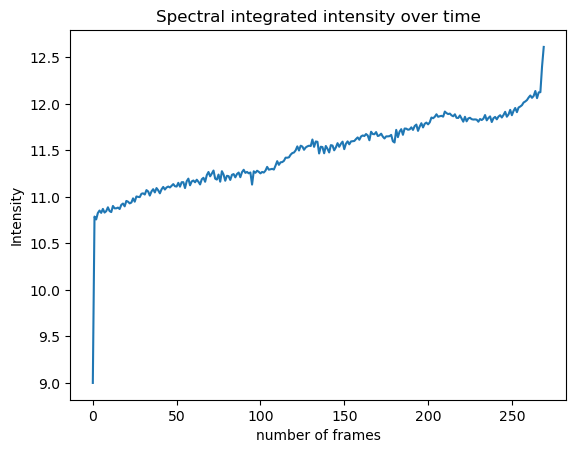

In [30]:
reload(un)
un.save_for_further_analysis(Ha, theor_Ha)


# Movie Making

In [31]:
import use_nessi as un1
# def Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False):
#     filename = f'E:/solar flares/data/animations/{name_of_flare.replace(".", "")}_{name_of_line}_animation.mp4'
#     import matplotlib.animation as animation

#     # if os.path.isfile(filename):
#     #     print(f"The filename {filename} already exist")
#     #     return

#     #params
#     frame = 0
#     fps = 6
#     nSeconds = 5
#     theta = sst_data.theta_nessi_to_quiet_sun
#     theta[1] = theta[2]

#     f_nessi_qs = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_qs 
#                                     , kind='linear', fill_value="extrapolate")
#     f_nessi_fov = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.spectr_fov 
#                                     , kind='linear', fill_value="extrapolate")
#     f_nessi_saas = lambda theta: interp1d(theor_line.sst_wav , theta[1] * theor_line.saas_profile 
#                                     , kind='linear', fill_value="extrapolate")


#     wav = un.merge_wavelengths(sst_data._wavel - theta[0], theor_line.sst_wav)
#     if "CaK" in name_of_line:
#         wav = wav[:-1]



#     limit = un1.derive_intensity_lim(sst_data, 
#                                     mins=[np.min(f_nessi_saas(theta)(wav)), np.min(f_nessi_fov(theta)(wav))],
#                                     maxs=[np.max(f_nessi_saas(theta)(wav)), np.max(f_nessi_fov(theta)(wav))])

#     def frame_visualization(sst_data, frame, theta):
#         fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20, 8), gridspec_kw={"width_ratios":[1,1]})

#         sst_data.ccp_frame(frame,Show=False)
#         a=sst_data.current_ccp

#         ax[0].set_title(f"spectral line {name_of_line} of {name_of_flare} flare")
#         sst_data.frame_integrated_spect(frame)
#         if 'CaK' in name_of_line:
#             line_sst, = ax[0].plot(sst_data._wavel[:-1]-theta[0], sst_data.av_spect[:-1], '--', label='sst data') 
#         else:
#             line_sst, = ax[0].plot(sst_data._wavel-theta[0], sst_data.av_spect, '--', label='sst data')
#         ax[0].plot(wav , f_nessi_fov(theta)(wav), label='nessi FOV')
#         ax[0].plot(wav, f_nessi_saas(theta)(wav), label='nessi full disk')
#         ax[0].legend()

#         ax[0].set_ylim(limit)

#         im = ax[1].imshow(Image.fromarray(sst_data.current_ccp[::-1,:]))
#         if show_boundary:
#             ax[1].imshow(Image.fromarray(sst_data.boundary[::-1,:]), alpha=0.3)
#         ax[1].set_title("COCOplot")
#         text = ax[1].text(
#             -300,
#             -20,
#             f"frame: {frame}, {un.time_hulp(sst_data.TIME[frame])}",
#             fontsize=12,
#             color='red',
#         )
#         print(
#             f"frame: {frame}, {sst_data._time[frame]}, total number of frames: {sst_data._number_of_frames} "
#         )

#         plt.show()

#         return fig, line_sst,  im, text




#     fig, line_sst, im, text, = frame_visualization(sst_data, frame, sst_data.theta_nessi_to_quiet_sun)

#     # animation function.  This is called sequentially
#     def animate(i):
#         # step of number of frames. How to step through the frames, at which rate.
#         frame = step * i

#         x = sst_data._wavel-theta[0]
#         y = sst_data.frame_integrated_spect(frame)
#         # f_sst2 = interp1d(sst_data._wavel-theta[0], y, kind='linear', fill_value="extrapolate")
#         line_sst.set_data(x, y)

#         print(frame, end=" ")


#         text.set_text(f"frame: {str(frame)}, {str(sst_data._time[frame])[:8]}")
#         # text = ax[1].text(
#         #     -300, -20, f"frame: {str(frame)}, {str(sst_data._time[frame])[2:10]}", fontsize=12, color='red'
#         # )    
#         sst_data.ccp_frame(frame,Show=False)
#         a = sst_data.current_ccp
#         im.set_array(Image.fromarray(a[::-1,:]))
#         return line_sst, [im], text


#     # call the animator.  blit=True means only re-draw the parts that have changed.
#     anim = animation.FuncAnimation(fig, animate,
#                                 frames=(sst_data._number_of_frames-1) // step, interval=500) 

#     # save the animation as an mp4.  This requires ffmpeg or mencoder to be
#     # installed.  The extra_args ensure that the x264 codec is used, so that
#     # the video can be embedded in html5.  You may need to adjust this for
#     # your system: for more information, see
#     # http://matplotlib.sourceforge.net/api/animation_api.html
#     anim.save(filename, fps=fps, extra_args=['-vcodec', 'libx264'])


    


[0.250624211269652, 0, 3.1764373075402883]
Frame: 0, 12:39:53, total number of frames: 270 


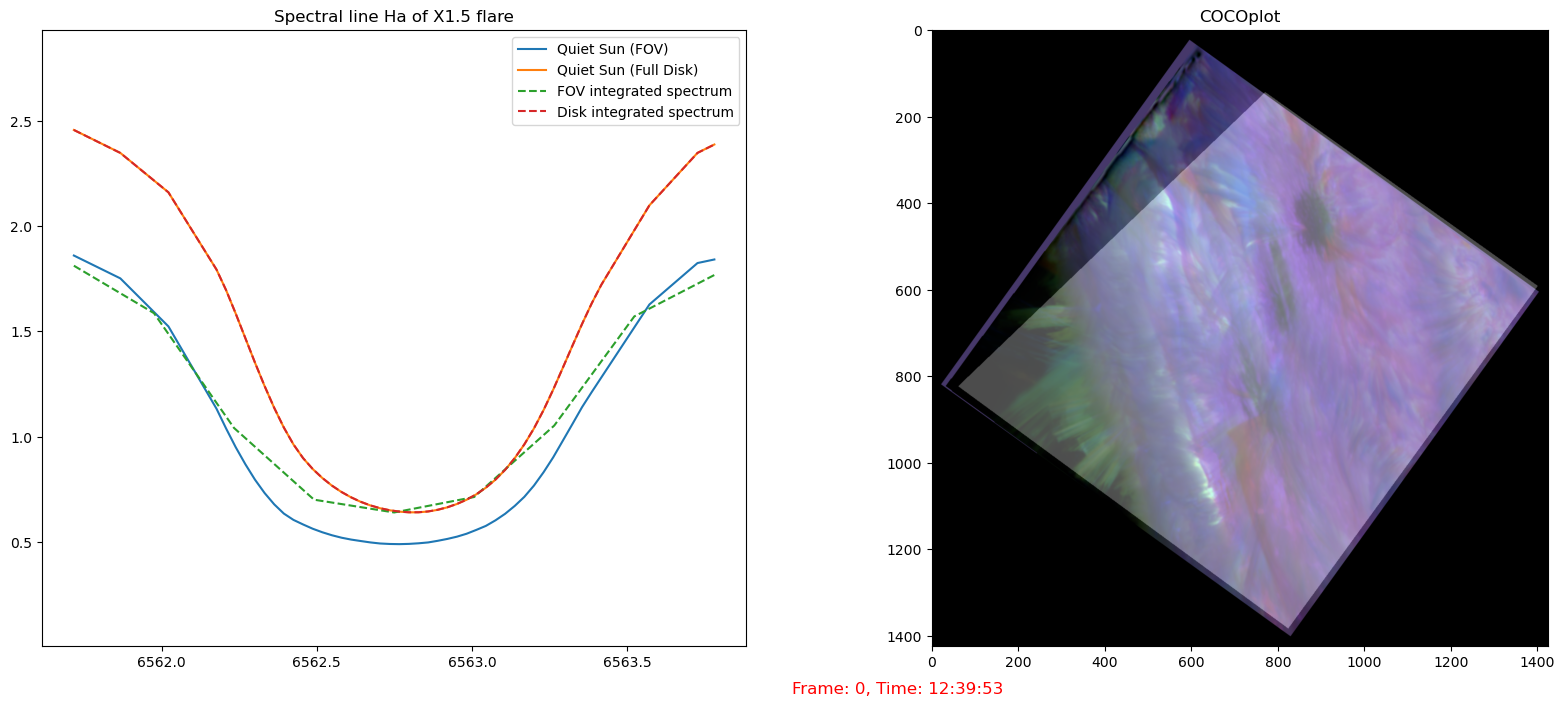

In [32]:
# fill in here all arguments
theor_line = theor_line
sst_data = Ha
name_of_flare = "X1.5"
name_of_line = "Ha"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=2, show_boundary=True)

In [33]:
# import use_nessi as un1
# reload(un1)
# un1.Difference_Movie_gray(theor_line, sst_data, name_of_flare, name_of_line, wavelength=6, 
#                          step=1, show_boundary=False, frame_offset=5, time_offset=60, only_frame=None)
